In [1]:
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

seed=111
np.random.seed(seed)

In [2]:
mydf = pd.read_csv("datasets/mystyle.csv")
mydf = mydf[['articleType', 'id']].groupby('articleType').head(200)

In [3]:
targets = [ "Shirts", "Watches", "Sports Shoes", "Tops", "Handbags", "Heels", "Sunglasses", "Backpacks", "Jeans", "Shorts"]
train_df = mydf[['articleType', 'id']].sample(frac=0.8,random_state = seed) 
test_df = mydf[['articleType', 'id']].drop(train_df.index)

In [4]:
groups = 5 # There are 40 unique targets in the dataset
pgms = 10 # For each group, there are 10 pgms

img_id = 10445
path = "datasets/images/{}.jpg".format(img_id)
imagearray = io.imread(path, as_gray = True)
original_shape = imagearray.shape 
print(original_shape) # need to keep original shape

(80, 60)


In [5]:
matrix_train = np.matrix([])

for i, cat in enumerate(targets):
    for j, img_id in enumerate(train_df[train_df["articleType"] == cat]['id']):
        path = "datasets/images/{}.jpg".format(img_id)
        img = io.imread(path, as_gray = True)
        # make a 1-dimensional matrix of image
        a, b = img.shape
        if a != 80 or b!=60:
            continue
        matrix = np.matrix(img.ravel())
        _, cols = matrix_train.shape
        if cols == 0:
            matrix_train = matrix
        else:
            # row cat 
            matrix_train = np.r_[matrix_train, matrix] 

In [6]:
print(matrix_train.shape)

(1597, 4800)


In [7]:
test_ids = list(test_df['id'])
matrix_test = np.matrix([])

for img_id in test_ids:
    path = "datasets/images/{}.jpg".format(img_id)
    img = io.imread(path, as_gray = True)
    matrix = np.matrix(img.ravel())
    _, cols = matrix_test.shape
    if cols == 0:
        matrix_test = matrix
    else:
        # row cat 
        matrix_test = np.r_[matrix_test, matrix] 

In [8]:
print(matrix_test.shape)

(400, 4800)


In [9]:
train_t = np.transpose(matrix_train) 
print("The shape of face matrix:")
print(train_t.shape)
print("\n")
print("The face matrix is\n")

with np.printoptions(precision=3, suppress=True):
    print(train_t)

The shape of face matrix:
(4800, 1597)


The face matrix is

[[1.    1.    1.    ... 1.    1.    1.   ]
 [1.    1.    1.    ... 1.    1.    1.   ]
 [1.    1.    1.    ... 1.    1.    1.   ]
 ...
 [0.995 1.    0.999 ... 1.    1.    1.   ]
 [0.992 1.    1.    ... 1.    1.    1.   ]
 [0.995 1.    0.997 ... 1.    1.    1.   ]]


/Users/zihe/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


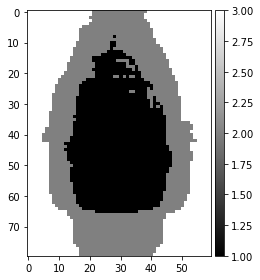

In [11]:
train_mean = np.mean(train_t, axis=1)
data = train_mean.astype(np.uint8)
face = np.asarray(data).reshape(original_shape) # (80, 60)
io.imshow(face, cmap = "gray")

In [12]:
train_normed_t = train_t - train_mean
print("The shape of normalized face matrix:")
print(train_normed_t.shape)
print("\n")
print("The normalized face matrix is\n")

with np.printoptions(precision=3, suppress=True):
    print(train_normed_t)

The shape of normalized face matrix:
(4800, 1597)


The normalized face matrix is

[[-2.065 -2.065 -2.065 ... -2.065 -2.065 -2.065]
 [-2.065 -2.065 -2.065 ... -2.065 -2.065 -2.065]
 [-2.064 -2.064 -2.064 ... -2.064 -2.064 -2.064]
 ...
 [-2.068 -2.063 -2.064 ... -2.063 -2.063 -2.063]
 [-2.072 -2.063 -2.063 ... -2.063 -2.063 -2.063]
 [-2.068 -2.064 -2.066 ... -2.064 -2.064 -2.064]]


In [13]:
#1) Get the reduced covariance matrix based on Turk and Pentland:
train_normed = np.transpose(train_normed_t) 
CovMatrix=np.matmul(train_normed, train_normed_t) 
print("The shape of covariance matrix:")
print(CovMatrix.shape)
print("\n")
print("The covariance matrix is\n")

with np.printoptions(precision=3, suppress=True):
    print(CovMatrix)

The shape of covariance matrix:
(1597, 1597)


The covariance matrix is

[[14938.633 14690.21  15373.191 ... 14137.214 14499.346 14605.603]
 [14690.21  14632.281 15207.818 ... 14001.908 14354.303 14455.355]
 [15373.191 15207.818 16094.463 ... 14737.014 14973.097 15054.122]
 ...
 [14137.214 14001.908 14737.014 ... 13881.805 13923.849 14010.437]
 [14499.346 14354.303 14973.097 ... 13923.849 14461.903 14468.732]
 [14605.603 14455.355 15054.122 ... 14010.437 14468.732 14661.305]]


In [14]:
# 2) Get eigenvalues and eigenvectors
evals,evects = np.linalg.eig(CovMatrix) 

k = 30
idx = evals.argsort()[::-1][:k] 
eigenValues = evals[idx]
eigenVectors = evects[:,idx]

print("The 30 highest eigenvalues and corresponding eigenvectors:")
print("\n")
print(eigenValues)
print("\n")

print("The shape of eigenvectors:")
print(eigenVectors.shape)
print("\n")
with np.printoptions(precision=3, suppress=True):
    print(eigenVectors)

The 30 highest eigenvalues and corresponding eigenvectors:


[2.75867092e+09 6.87553098e+07 4.42670689e+07 2.16624933e+07
 1.84681521e+07 1.68904069e+07 1.43127003e+07 7.85084059e+06
 7.22178231e+06 5.79839050e+06 4.83359194e+06 4.20054002e+06
 4.07117639e+06 2.56512087e+04 2.00903823e+04 1.07364465e+04
 9.34486241e+03 6.33345857e+03 5.25592114e+03 4.94368546e+03
 4.01312693e+03 3.64990161e+03 3.31684228e+03 2.90533195e+03
 2.76354016e+03 2.59247698e+03 2.44557436e+03 2.18464066e+03
 2.05591892e+03 1.96478483e+03]


The shape of eigenvectors:
(1597, 30)


[[-0.002 -0.001 -0.    ... -0.003 -0.02  -0.04 ]
 [-0.002 -0.    -0.    ...  0.002 -0.035  0.024]
 [-0.002  0.001  0.    ...  0.022 -0.03  -0.013]
 ...
 [-0.002  0.     0.    ... -0.024 -0.018  0.035]
 [-0.002 -0.    -0.    ...  0.032  0.003 -0.041]
 [-0.002 -0.001 -0.001 ...  0.008  0.01  -0.015]]


In [15]:
vector = train_normed_t * eigenVectors[:,:1]
eigenfaces = vector

for i in range(k):
    if i == 0:
        continue
    vector = train_normed_t * eigenVectors[:,i:i+1]
    eigenfaces = np.c_[eigenfaces,vector]
    
print("The shape of eigenfaces:")
print(eigenfaces.shape)
print("\n")
print("The eigenfaces is\n")

with np.printoptions(precision=3, suppress=True):
    print(eigenfaces)

The shape of eigenfaces:
(4800, 30)


The eigenfaces is

[[908.867  71.438 -15.042 ...   0.089  -0.085  -0.062]
 [908.867  71.438 -15.042 ...   0.09   -0.085  -0.062]
 [908.868  71.438 -15.042 ...   0.076  -0.091  -0.054]
 ...
 [908.634  70.954 -15.1   ...   0.081  -0.084  -0.008]
 [908.633  70.954 -15.101 ...   0.084  -0.083  -0.037]
 [908.633  70.954 -15.101 ...   0.085  -0.083  -0.061]]


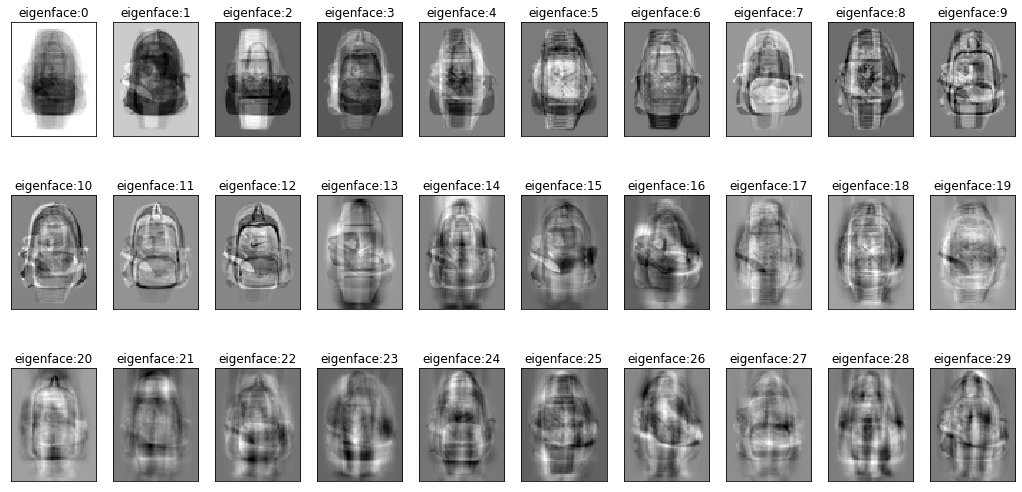

In [16]:
#Creating 3X10 subplots in  18x9 figure size
fig, axarr=plt.subplots(nrows=3, ncols=10, figsize=(18, 9))
#For easy iteration flattened 3X10 subplots matrix to 30 array
axarr=axarr.flatten()
    
#iterating over user ids
for i in range(30):
    face = np.asarray(eigenfaces[:,i]).reshape(original_shape) # make a PIL image and save it to jpg
    axarr[i].imshow(face, cmap='gray')
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigenface:{}".format(i))
# plt.suptitle("Figure 3: The 30 top eigenfaces")

In [17]:
eigenfaces_t = np.transpose(eigenfaces)
train_projected = eigenfaces_t * train_normed_t

In [18]:
train_projected.shape

(30, 1597)

In [20]:
test_ids = list(test_df.sample(10)['id'])

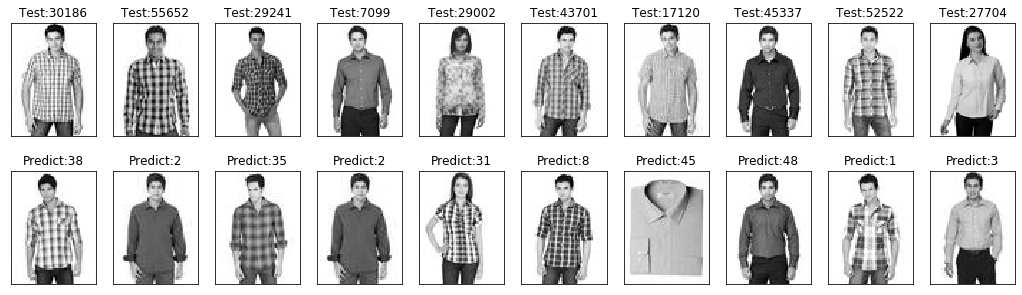

In [21]:
eigenfaces_t = np.transpose(eigenfaces)
train_projected = eigenfaces_t * train_normed_t

fig, axarr=plt.subplots(nrows=2, ncols=10, figsize=(18, 5))
cols = 2
    
for i, subject_id in enumerate(test_ids):
    face = np.asarray(matrix_test[i]).reshape(original_shape) # make a PIL image and save it to jpg
    axarr[0,i].set_title("Test:{}".format(subject_id))
    axarr[0,i].imshow(face, cmap="gray")
    axarr[0,i].set_xticks([])
    axarr[0,i].set_yticks([])

    test_t = np.transpose(matrix_test[i])
    test_normed_t = (test_t - train_mean)
    test_projected = eigenfaces_t * test_normed_t
    distances = [] 
    for m in range(50):
        distance = np.linalg.norm(train_projected[:,m] - test_projected)
        distances.append(distance)
    idx = distances.index(min(distances))
    face = np.asarray(matrix_train[idx]).reshape(original_shape) 
    axarr[1,i].set_title("Predict:{}".format(idx))
    axarr[1,i].imshow(face, cmap="gray")
    axarr[1,i].set_xticks([])
    axarr[1,i].set_yticks([])
        